In [1]:
# Import packages
import os
import argparse
import time
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the dict and convert it to a df
F = open('../data/interface_hydrophobicity_output.txt', "r")
X = F.readlines()
RESULTS_hydro = X

G = open('../data/interface_hydrophobicity_output_originalmasif_train.txt', "r")
Y = G.readlines()
RESULTS_original = Y

In [3]:
#Functions to read .txt and convert to a list of dicts
new_line_clipper = lambda x: x.replace("\n", "")
nan_replacer = lambda x: x.replace("nan", '"No result"' )
input_to_dict = lambda x: ast.literal_eval(x)

In [4]:
# Map function above to strings in list to convert to list of dicts

results_h = list(map(new_line_clipper, RESULTS_hydro))
results_h = list(map(nan_replacer, results_h))
results_h = list(map(input_to_dict, results_h))

results_o = list(map(new_line_clipper, RESULTS_original))
results_o = list(map(nan_replacer, results_o))
results_o = list(map(input_to_dict, results_o))

In [5]:
results_h_df = pd.DataFrame(results_h, columns = ['Protein_pdb', 'Total_mean_hydrophobicity', 'Former_chains_hydrophobicity'])
results_h_df = results_h_df.applymap(lambda x: x[0])

results_o_df = pd.DataFrame(results_o, columns = ['Protein_pdb', 'Total_mean_hydrophobicity', 'Former_chains_hydrophobicity'])
results_o_df = results_o_df.applymap(lambda x: x[0])

In [6]:
results_h_df.rename(columns = {"Total_mean_hydrophobicity": "Total hydrophobicity"}, inplace=True)
results_h_df.rename(columns = {"Former_chains_hydrophobicity": "Paratope hydrophobicity"}, inplace=True)
results_o_df.rename(columns = {"Total_mean_hydrophobicity": "Total hydrophobicity"}, inplace=True)
results_o_df.rename(columns = {"Former_chains_hydrophobicity": "Paratope hydrophobicity"}, inplace=True)

In [7]:
results_h_df = results_h_df.replace('No result', np.nan)
results_o_df = results_o_df.replace('No result', np.nan)

In [8]:
pd.to_numeric(results_h_df["Total hydrophobicity"], downcast = 'float')
pd.to_numeric(results_o_df["Total hydrophobicity"], downcast = 'float')

0       1.916667
1      18.962122
2     -16.562500
3      54.333332
4      13.400000
         ...    
290    17.948864
291    27.833334
292     9.440909
293    22.309525
294    18.500000
Name: Total hydrophobicity, Length: 295, dtype: float32

In [9]:
results_h_df = results_h_df.dropna()
results_o_df = results_o_df.dropna()

In [10]:
results_h_df

,Protein_pdb,Total hydrophobicity,Paratope hydrophobicity
0,2YPV_HL_A,-11.716667,-4.833333
1,2H9G_HL_S,39.375000,29.000000
2,4RRP_IC_O,21.450000,20.000000
3,5W5Z_HL_A,-4.250000,-4.250000
4,1RJL_BA_C,4.625000,30.250000
...,...,...,...
307,5KVF_HL_E,19.833333,4.000000
308,6FLC_HL_G,18.937500,26.625000
309,4U6V_HL_A,12.166667,52.000000
310,6B08_CB_A,3.215476,-9.583333


In [14]:
results_h_df['Total hydrophobicity'].mean()

14.444511903551328

In [13]:
results_o_df['Total hydrophobicity'].mean()

20.80672856607725

/Users/maxjansen/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


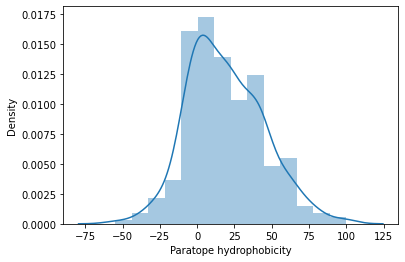

In [29]:
plt.clf()
ax = sns.distplot(results_h_df['Paratope hydrophobicity'])
plt.savefig('AB_hydro_dist.png')

/Users/maxjansen/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


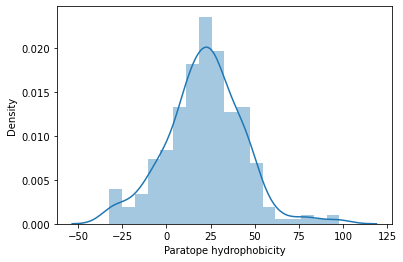

In [30]:
plt.clf()
ax = sns.distplot(results_o_df['Paratope hydrophobicity'])
plt.savefig('AB_hydro_dist.png')

In [31]:
#Merge two types of datasets for former chain (paratope)
results_h_df['Type'] = 'Antibody'
results_o_df['Type'] = 'Original training'
all_sets_df = pd.concat([results_h_df, results_o_df])

In [32]:
all_sets_df

,Protein_pdb,Total hydrophobicity,Paratope hydrophobicity,Type
0,2YPV_HL_A,-11.716667,-4.833333,Antibody
1,2H9G_HL_S,39.375000,29.000000,Antibody
2,4RRP_IC_O,21.450000,20.000000,Antibody
3,5W5Z_HL_A,-4.250000,-4.250000,Antibody
4,1RJL_BA_C,4.625000,30.250000,Antibody
...,...,...,...,...
290,1GYL_A_B,17.948864,12.272727,Original training
291,1GYY_A_B,27.833333,27.833333,Original training
292,1GZ3_A_B,9.440909,9.181818,Original training
293,1GZS_A_B,22.309524,15.285714,Original training


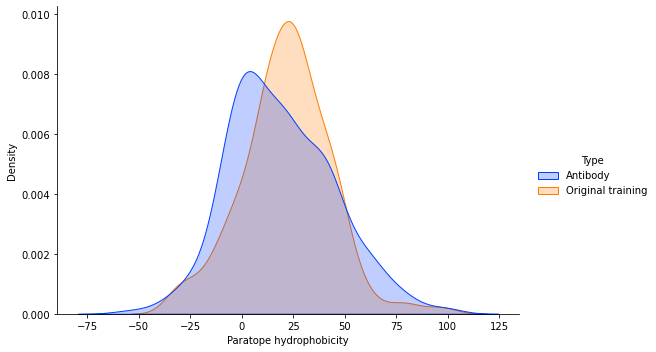

In [33]:
sns.displot(data=all_sets_df, x='Paratope hydrophobicity', hue='Type', kind='kde',
            fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

/Users/maxjansen/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


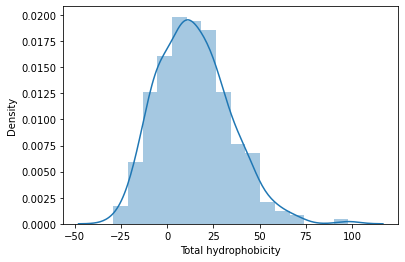

In [34]:
plt.clf()
ax = sns.distplot(results_h_df['Total hydrophobicity'])
plt.savefig('Total_hydro_dist.png')

/Users/maxjansen/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


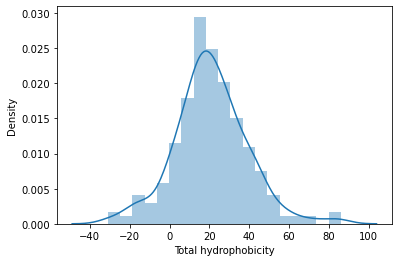

In [35]:
plt.clf()
ax = sns.distplot(results_o_df['Total hydrophobicity'])
plt.savefig('Total_hydro_dist.png')

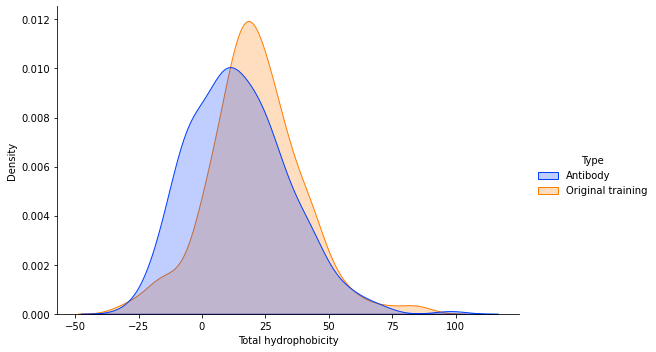

In [36]:
sns.displot(data=all_sets_df, x='Total hydrophobicity', hue='Type', kind='kde',
            fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)